In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 


data = pd.read_csv("wholesale_customers.csv")
data.drop(['Region', 'Channel'], axis = 1, inplace = True)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


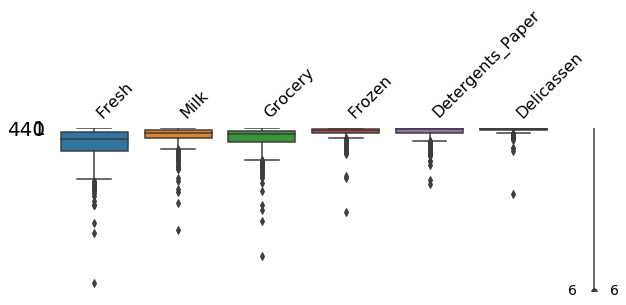

In [12]:
# Display the data
data.describe()

# Missing data detection
msno.matrix(data,figsize=(10,3))

# Data distribution
sns.boxplot(data=data, orient="v")

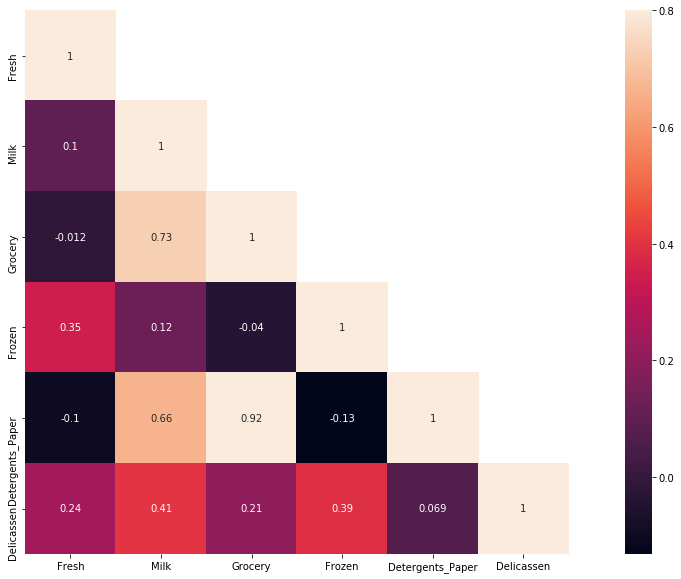

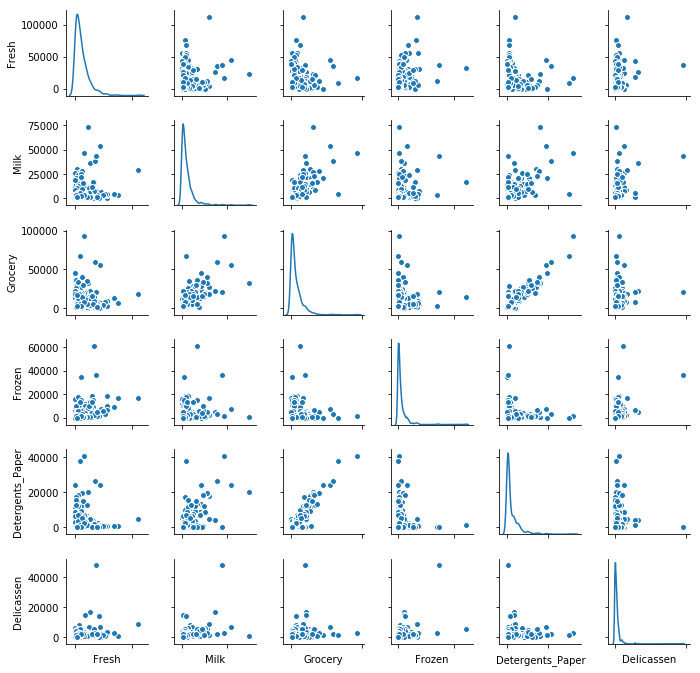

In [11]:
# Correlation analasys
corrMatt = data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

# Scatterplot
mx_plot = sns.pairplot(data, diag_kind="kde", size=1.6)
mx_plot.set(xticklabels=[])

### modeling

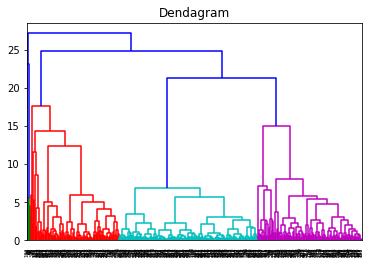

In [8]:
X = data.drop(["Grocery"], axis = 1)
# Scale data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create dendragram
dendagram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title("Dendagram")
plt.show()
#y groups

In [16]:
# Creating model
model = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'ward')
y_out = model.fit_predict(X)

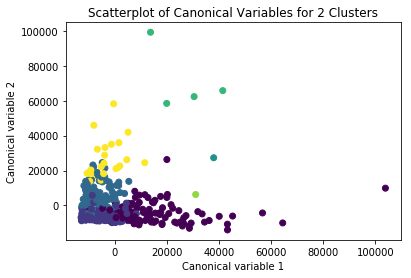

In [17]:
pca_2 = PCA(2) # Two Canonical Variables
plot_columns = pca_2.fit_transform(data)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model.labels_)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 2 Clusters')
plt.show()